<h3>Training Models</h3>

In many situations, you don't really need to know the implementation details. In the previous chapters, we optimized a regression system, improved a digit image classifier, and built a spam classifier from scratch -- all without knowing how they actually work. Having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters. You can also debug issues and perform error analysis more efficiently. 

This chapter will cover Linear Regression, Gradient Descent variants, Polynomial Regression, Logistic Regression, and Softmax Regression.

<h3>Linear Regression</h3>

In chapter 1, there was a simple regression model of life satisfaction: life_satisfaction = $\theta_0 + \theta_1 \times$ GDP_per_capita

The model is just a linear function of the input feature GDP_per_capita. $\theta_0$ and $\theta_1$ are the model's parameters. More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the <i>bias term</i> (also called the <i>intercept term</i>), as shown below:

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \times$ GDP_per_capita

$\hat{y}$ is the predicted value

$n$ is the number of features

$x_i$ is the $i$th feature value

$\theta_j$ is the $j$th model parameter

This equation can be written much more concisely in vectorized form:

$\hat{y} = h_\theta (x) = \theta \cdot x$

$\theta$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

$x$ is the instance's <i>feature vector</i>, containing $x_0$ to $x_n$ with $x_0$ always equal to 1.

$\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is equal to $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

$h_\theta$ is the hypothesis function, using the model parameters $\theta$

So how do we train it? In Chapter 2, we saw the most common performance measure of a regression model is RMSE. Let's minimize the value of $\theta$ that minimizes the RMSE. We can actually minimize MSE since it's a bit simpler, and gives the same result.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

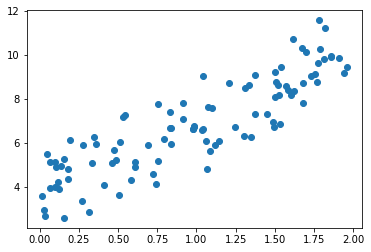

In [4]:
plt.scatter(X, y)

In [5]:
# Generate value that minimizes cost function

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function used to generate the data is $y = 4 + 3x_1 +$ Gaussian noise

In [7]:
theta_best

array([[3.82529707],
       [3.05582939]])

We would have hoped for $\theta_0 = 4$ and $\theta_1 = 3$, but these values are close, and the noise made it impossible to extract the exact parameters of the original function.

Now we can make predicitons using $\hat{\theta}$

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.82529707],
       [9.93695586]])

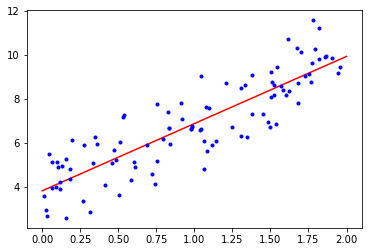

In [11]:
# Plot the prediction line

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

In [12]:
# Now let's do linear regression using scikit-learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.82529707]), array([[3.05582939]]))

In [13]:
lin_reg.predict(X_new)

array([[3.82529707],
       [9.93695586]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (least squares). You can call this directly:

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [15]:
theta_best_svd

array([[3.82529707],
       [3.05582939]])

This function computes the pseudoinverse of X (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[3.82529707],
       [3.05582939]])

<h3>Computational Complexity</h3>

The Normal Equation computes the inverse of $X^{T} X$, which is $O(n^{2.4})$ to $O(n^3)$ depending on the implementation. If you double the number of features, you multiply the computation time by roughly $2^{2.4}$ = 5.3 to $2^3$ = 8. Scikit-Learn's `LinearRegression` class is about $O(n^2)$. 

Note that once you have trained the Linear Regression model, predicitons are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. Making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.

<h3>Gradient Descent</h3>

This is a very different way to train a Linear Regression model, better suited for cases where there are a large number of features, or too many training instances to fit into memory.

<i>Gradient Descent</i> is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of GD is to tweak parameters iteratively in order to minimize a cost function.

p.112